In [1]:
#!pip install missingno


In [2]:
import pylab
import calendar
import numpy as np
import pandas as pd
import seaborn as sn
from scipy import stats
import missingno as msno
from datetime import datetime
import matplotlib.pyplot as plt
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)
%matplotlib inline

In [3]:
dailyData = pd.read_csv("train.csv")

In [4]:
#Shape Of The Dataset
dailyData.shape


(10886, 12)

In [5]:
#Sample Of First Few Rows
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1


In [6]:
dailyData["season"].unique()

array([1, 2, 3, 4], dtype=int64)

In [7]:
#Variables Data Type
dailyData.dtypes

datetime       object
season          int64
holiday         int64
workingday      int64
weather         int64
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
dtype: object

# Feature Engineering
As we see from the above results, the columns "season","holiday","workingday" and "weather" should be of "categorical" data type.But the current data type is "int" for those columns. Let us transform the dataset in the following ways so that we can get started up with our EDA

Create new columns "date,"hour","weekDay","month" from "datetime" column.
Coerce the datatype of "season","holiday","workingday" and weather to category.
Drop the datetime column as we already extracted useful features from it.

In [9]:
#Creating New Columns From "Datetime" Column
dailyData["date"] = dailyData.datetime.apply(lambda x : x.split()[0])
dailyData["hour"] = dailyData.datetime.apply(lambda x : x.split()[1].split(":")[0])
dailyData["weekday"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d").weekday()])
dailyData["month"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d").month])
#dailyData["weekday_test"] = dailyData.date.apply(lambda dateString : calendar.day_name[datetime.strptime(dateString,"%Y-%m-%d")])
#dailyData["month_test"] = dailyData.date.apply(lambda dateString : calendar.month_name[datetime.strptime(dateString,"%Y-%m-%d")])
dailyData["season"] = dailyData.season.map({1: "Spring", 2 : "Summer", 3 : "Fall", 4 :"Winter" })
dailyData["weather"] = dailyData.weather.map({1: " Clear + Few clouds + Partly cloudy + Partly cloudy",\
                                        2 : " Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist ", \
                                        3 : " Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds", \
                                        4 :" Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog " })

In [10]:
dailyData.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,weekday,month
0,2011-01-01 00:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,81,0.0,3,13,16,2011-01-01,00,Saturday,January
1,2011-01-01 01:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,8,32,40,2011-01-01,01,Saturday,January
2,2011-01-01 02:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.02,13.635,80,0.0,5,27,32,2011-01-01,02,Saturday,January
3,2011-01-01 03:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,3,10,13,2011-01-01,03,Saturday,January
4,2011-01-01 04:00:00,Spring,0,0,Clear + Few clouds + Partly cloudy + Partly c...,9.84,14.395,75,0.0,0,1,1,2011-01-01,04,Saturday,January


In [11]:
#Variables Data Type
dailyData.dtypes

datetime       object
season         object
holiday         int64
workingday      int64
weather        object
temp          float64
atemp         float64
humidity        int64
windspeed     float64
casual          int64
registered      int64
count           int64
date           object
hour           object
weekday        object
month          object
dtype: object

In [12]:
#Coercing To Category Type
categoryVariableList = ["hour","weekday","month","season","weather","holiday","workingday"]
for var in categoryVariableList:
    dailyData[var] = dailyData[var].astype("category")

In [13]:
#Variables Data Type
dailyData.dtypes

datetime        object
season        category
holiday       category
workingday    category
weather       category
temp           float64
atemp          float64
humidity         int64
windspeed      float64
casual           int64
registered       int64
count            int64
date            object
hour          category
weekday       category
month         category
dtype: object

# The categorical data type is useful in the following cases:

## A string variable consisting of only a few different values. Converting such a string variable to a categorical variable will save some memory, see here.
## The lexical order of a variable is not the same as the logical order (“one”, “two”, “three”). By converting to a categorical and specifying an order on the categories, sorting and min/max will use the logical order instead of the lexical order, see here.
## As a signal to other Python libraries that this column should be treated as a categorical variable (e.g. to use suitable statistical methods or plot types).

In [15]:
date_today="2024"

In [16]:
type(date_today)

str

In [17]:
date_today

'2024'

In [18]:
date_today_int=int(date_today)

In [19]:
# Dropping Unncessary Columns
dailyData  = dailyData.drop(["datetime"],axis=1)


[Text(0.5, 0, 'variableTypeariable Type'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Variables DataType Count')]

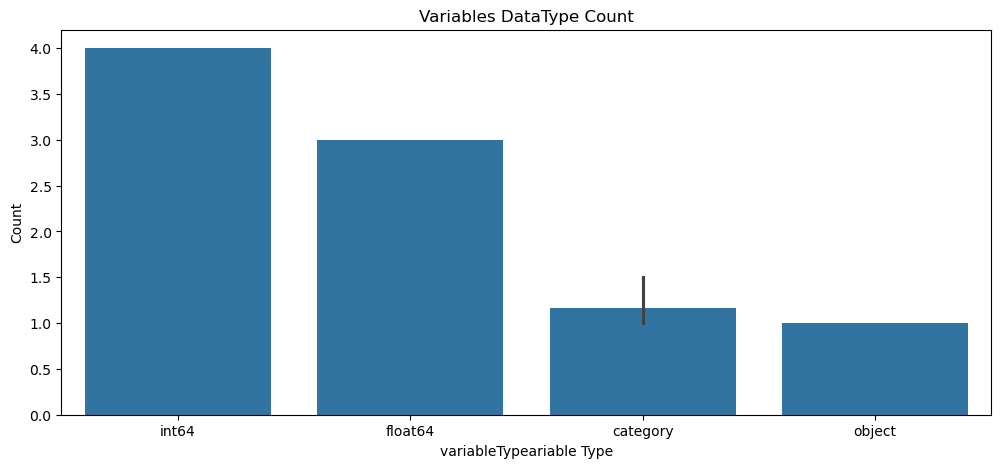

In [20]:
#Lets Start With Very Simple Visualization Of Variables DataType Count¶
dataTypeDf = pd.DataFrame(dailyData.dtypes.value_counts()).reset_index().rename(columns={"index":"variableType",0:"count"})
fig,ax = plt.subplots()
fig.set_size_inches(12,5)
sn.barplot(data=dataTypeDf,x="variableType",y="count",ax=ax)
ax.set(xlabel='variableTypeariable Type', ylabel='Count',title="Variables DataType Count")

# Missing Values Analysis¶## 
Once we get hang of the data and columns, next step we geneally is to find out whether we have any missing values in our data. Luckily we dont have any missing value in the dataset. One way which I generally prefer to visualize missing value in the dataset is through "missingno".## 

Its a quiet handy library to quickly visualize variables for missing values. As I mentioned earlier we got lucky this time as there no missing value in the dataset.

<Axes: >

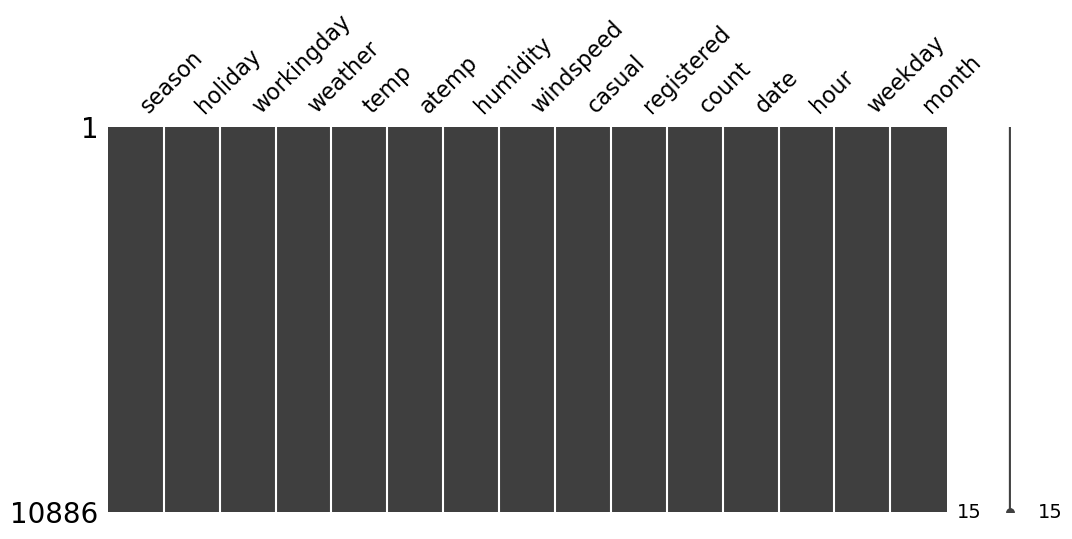

In [22]:
# Skewness In Distribution
msno.matrix(dailyData,figsize=(12,5))



# Outliers Analysis¶
## At first look, "count" variable contains lot of outlier data points which skews the distribution towards right (as there are more data points beyond Outer Quartile Limit).But in addition to that, following inferences can also been made from the simple boxplots given below.

## Spring season has got relatively lower count.The dip in median value in boxplot gives evidence for it.
## The boxplot with "Hour Of The Day" is quiet interesting.The median value are relatively higher at 7AM - 8AM and 5PM - 6PM. It can be attributed to regular school and office users at that time.
## Most of the outlier points are mainly contributed from "Working Day" than "Non Working Day". It is quiet visible from from figure 4.

[Text(0.5, 0, 'Working Day'),
 Text(0, 0.5, 'Count'),
 Text(0.5, 1.0, 'Box Plot On Count Across Working Day')]

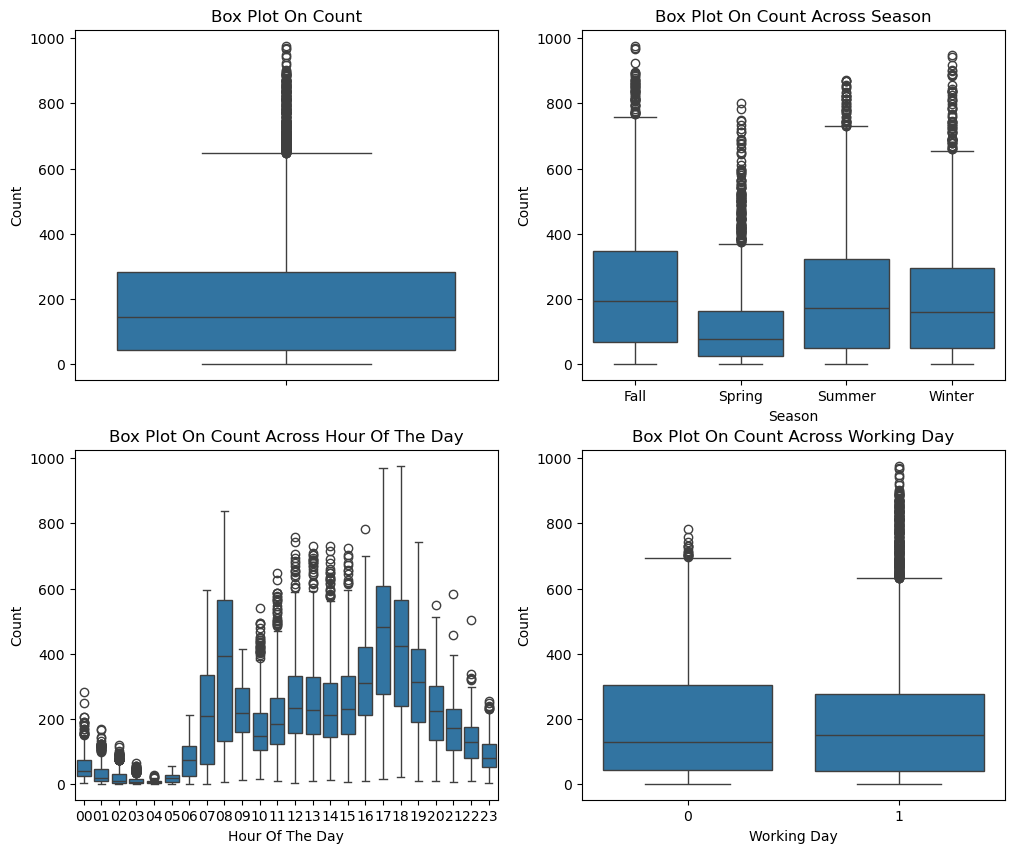

In [24]:
fig, axes = plt.subplots(nrows=2,ncols=2)
fig.set_size_inches(12, 10)
sn.boxplot(data=dailyData,y="count",orient="v",ax=axes[0][0])
sn.boxplot(data=dailyData,y="count",x="season",orient="v",ax=axes[0][1])
sn.boxplot(data=dailyData,y="count",x="hour",orient="v",ax=axes[1][0])
sn.boxplot(data=dailyData,y="count",x="workingday",orient="v",ax=axes[1][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Season', ylabel='Count',title="Box Plot On Count Across Season")
axes[1][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")

In [25]:
#Lets Remove Outliers In The Count Column
dailyDataWithoutOutliers = dailyData[np.abs(dailyData["count"]-dailyData["count"].mean())<=(3*dailyData["count"].std())] 

In [26]:
3*dailyData["count"].std()


543.4333614908548

In [27]:
dailyData["count"].std()


181.14445383028496

In [28]:
dailyData["count"].mean()

191.57413191254824

In [29]:
dailyData["count"].describe()

count    10886.000000
mean       191.574132
std        181.144454
min          1.000000
25%         42.000000
50%        145.000000
75%        284.000000
max        977.000000
Name: count, dtype: float64

In [30]:
dailyDataWithoutOutliers.count()

season        10739
holiday       10739
workingday    10739
weather       10739
temp          10739
atemp         10739
humidity      10739
windspeed     10739
casual        10739
registered    10739
count         10739
date          10739
hour          10739
weekday       10739
month         10739
dtype: int64

# 3 * dailyData["count"].std():
## This multiplies the standard deviation by 3. This is based on the common statistical rule (the 68-95-99.7 rule) that states that almost all (99.7%) of the data in a normal distribution lies within 3 standard deviations of the mean.

# <= (3 * dailyData["count"].std()):
## This checks whether the absolute deviation of each value is within 3 standard deviations of the mean. If a value's deviation is less than or equal to 3 standard deviations, it is considered to be within

# dailyDataWithoutOutliers: 
## 
The resulting DataFrame, dailyDataWithoutOutliers, will contain only the rows from dailyData where the "count" values are within the 3 standard deviation range, effectively removing the extreme outliers
This code removes outliers from the dailyData DataFrame by filtering out rows where the "count" value is more than 3 standard deviations away from the mean, keeping only the data that lies within this range.

In [32]:
print ("Shape Of The Before Ouliers: ",dailyData.shape)
print ("Shape Of The After Ouliers: ",dailyDataWithoutOutliers.shape)

Shape Of The Before Ouliers:  (10886, 15)
Shape Of The After Ouliers:  (10739, 15)


# Correlation Analysis¶
## One common to understand how a dependent variable is influenced by features (numerical) is to fibd a correlation matrix between them. Lets plot a correlation plot between "count" and ["temp","atemp","humidity","windspeed"].

## temp and humidity features has got positive and negative correlation with count respectively.Although the correlation between them are not very prominent still the count variable has got little dependency on "temp" and "humidity".
## windspeed is not gonna be really useful numerical feature and it is visible from it correlation value with "count"
## "atemp" is variable is not taken into since "atemp" and "temp" has got strong correlation with each other. During model building any one of the variable has to be dropped since they will exhibit multicollinearity in the data.
## "Casual" and "Registered" are also not taken into account since they are leakage variables in nature and need to dropped during model building.
## Regression plot in seaborn is one useful way to depict the relationship between two features. Here we consider "count" vs "temp", "humidity", "windspeed".

<Axes: >

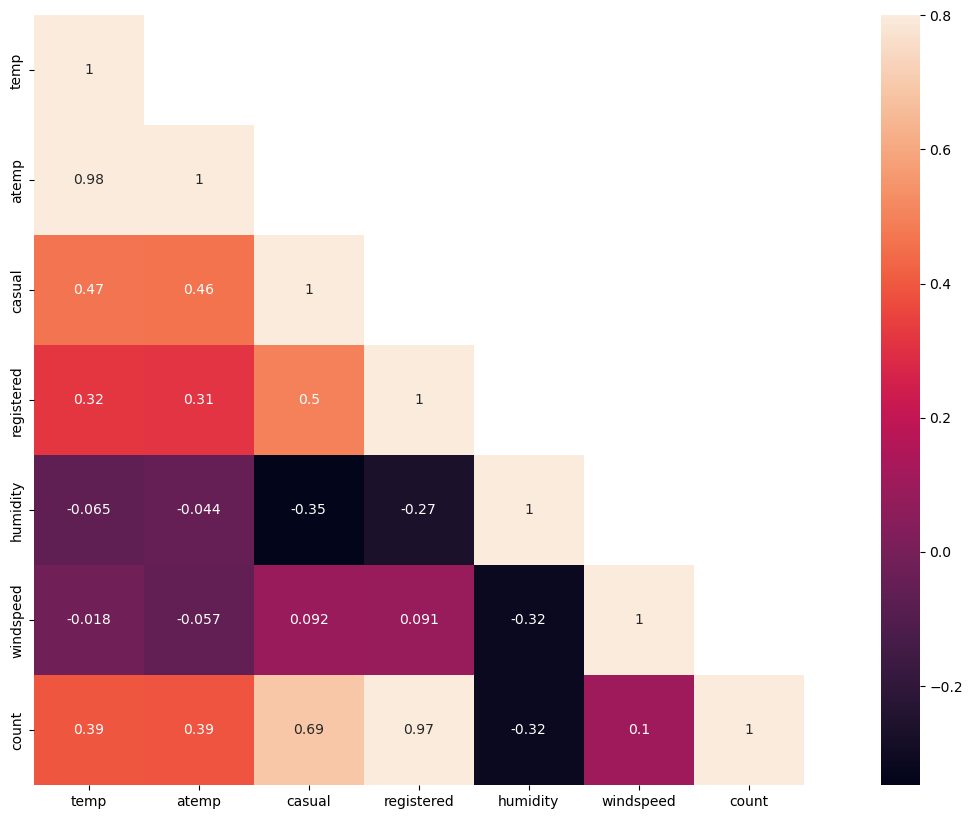

In [34]:
corrMatt = dailyData[["temp","atemp","casual","registered","humidity","windspeed","count"]].corr()
mask = np.array(corrMatt)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(20,10)
sn.heatmap(corrMatt, mask=mask,vmax=.8, square=True,annot=True)

<Axes: xlabel='humidity', ylabel='count'>

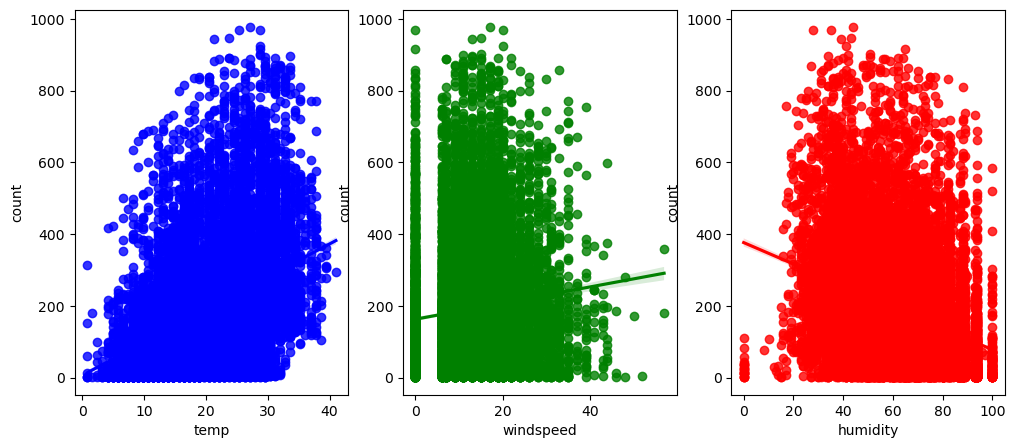

In [35]:
fig,(ax1,ax2,ax3) = plt.subplots(ncols=3)
fig.set_size_inches(12, 5)
sn.regplot(x="temp", y="count", data=dailyData,ax=ax1,color="blue")
sn.regplot(x="windspeed", y="count", data=dailyData,ax=ax2,color="green")
sn.regplot(x="humidity", y="count", data=dailyData,ax=ax3,color="red")

# Visualizing Distribution Of Data
## As it is visible from the below figures that "count" variable is skewed towards right. It is desirable to have Normal distribution as most of the machine learning techniques require dependent variable to be Normal. One possible solution is to take log transformation on "count" variable after removing outlier data points. After the transformation the data looks lot better but still not ideally following normal distribution.

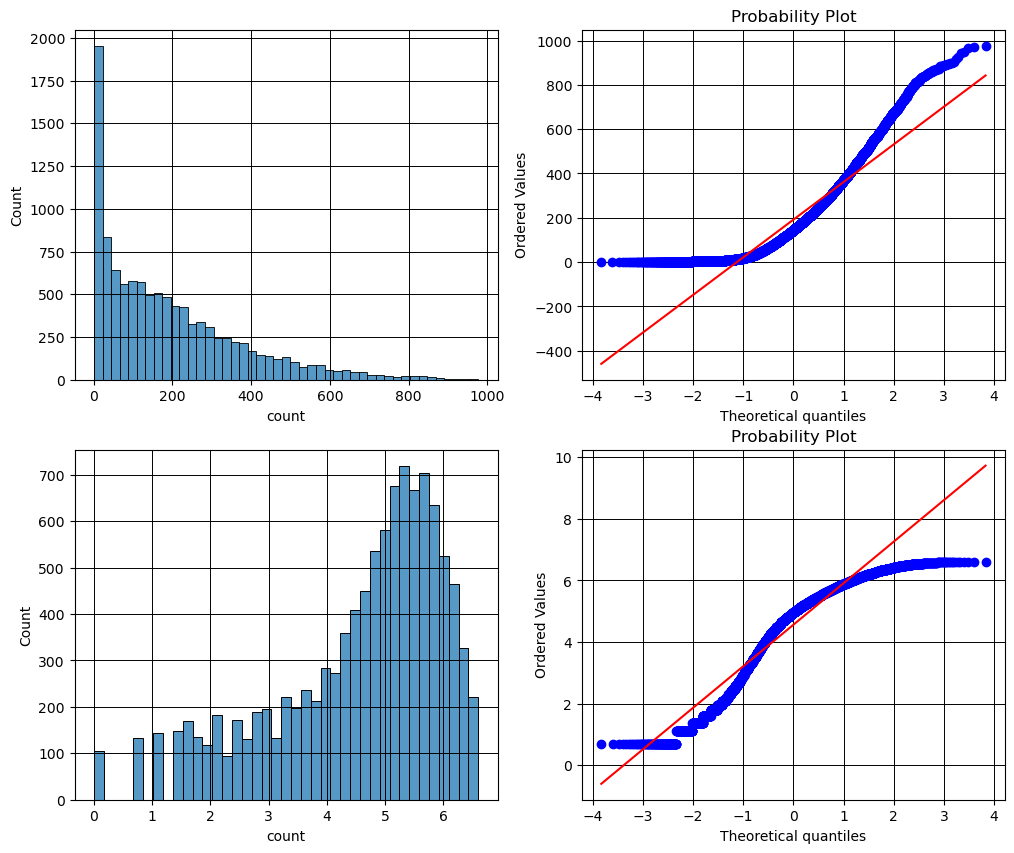

In [37]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.histplot(dailyData["count"],ax=axes[0][0])
axes[0][0].grid(True, color='black', linestyle='-', linewidth=0.7)

stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
axes[0][1].grid(True, color='black', linestyle='-', linewidth=0.7)

sn.histplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
axes[1][0].grid(True, color='black', linestyle='-', linewidth=0.7)

stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])
axes[1][1].grid(True, color='black', linestyle='-', linewidth=0.7)

#distplot is deprecated, using histplot

# Visualizing Count Vs (Month,Season,Hour,Weekday,Usertype)
## It is quiet obvious that people tend to rent bike during summer season since it is really conducive to ride bike at that season.Therefore June, July and August has got relatively higher demand for bicycle.
## On weekdays more people tend to rent bicycle around 7AM-8AM and 5PM-6PM. As we mentioned earlier this can be attributed to regular school and office commuters.
## Above pattern is not observed on "Saturday" and "Sunday".More people tend to rent bicycle between 10AM and 4PM.
## The peak user count around 7AM-8AM and 5PM-6PM is purely contributed by registered user.

C:\Users\prith\AppData\Local\Temp\ipykernel_8488\3591797698.py:9: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
C:\Users\prith\AppData\Local\Temp\ipykernel_8488\3591797698.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sn.barplot(data=monthSorted, x="month", y="count", ax=ax1, order=sortOrder, palette="coolwarm")
C:\Users\prith\AppData\Local\Temp\ipykernel_8488\3591797698.py:16: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt t

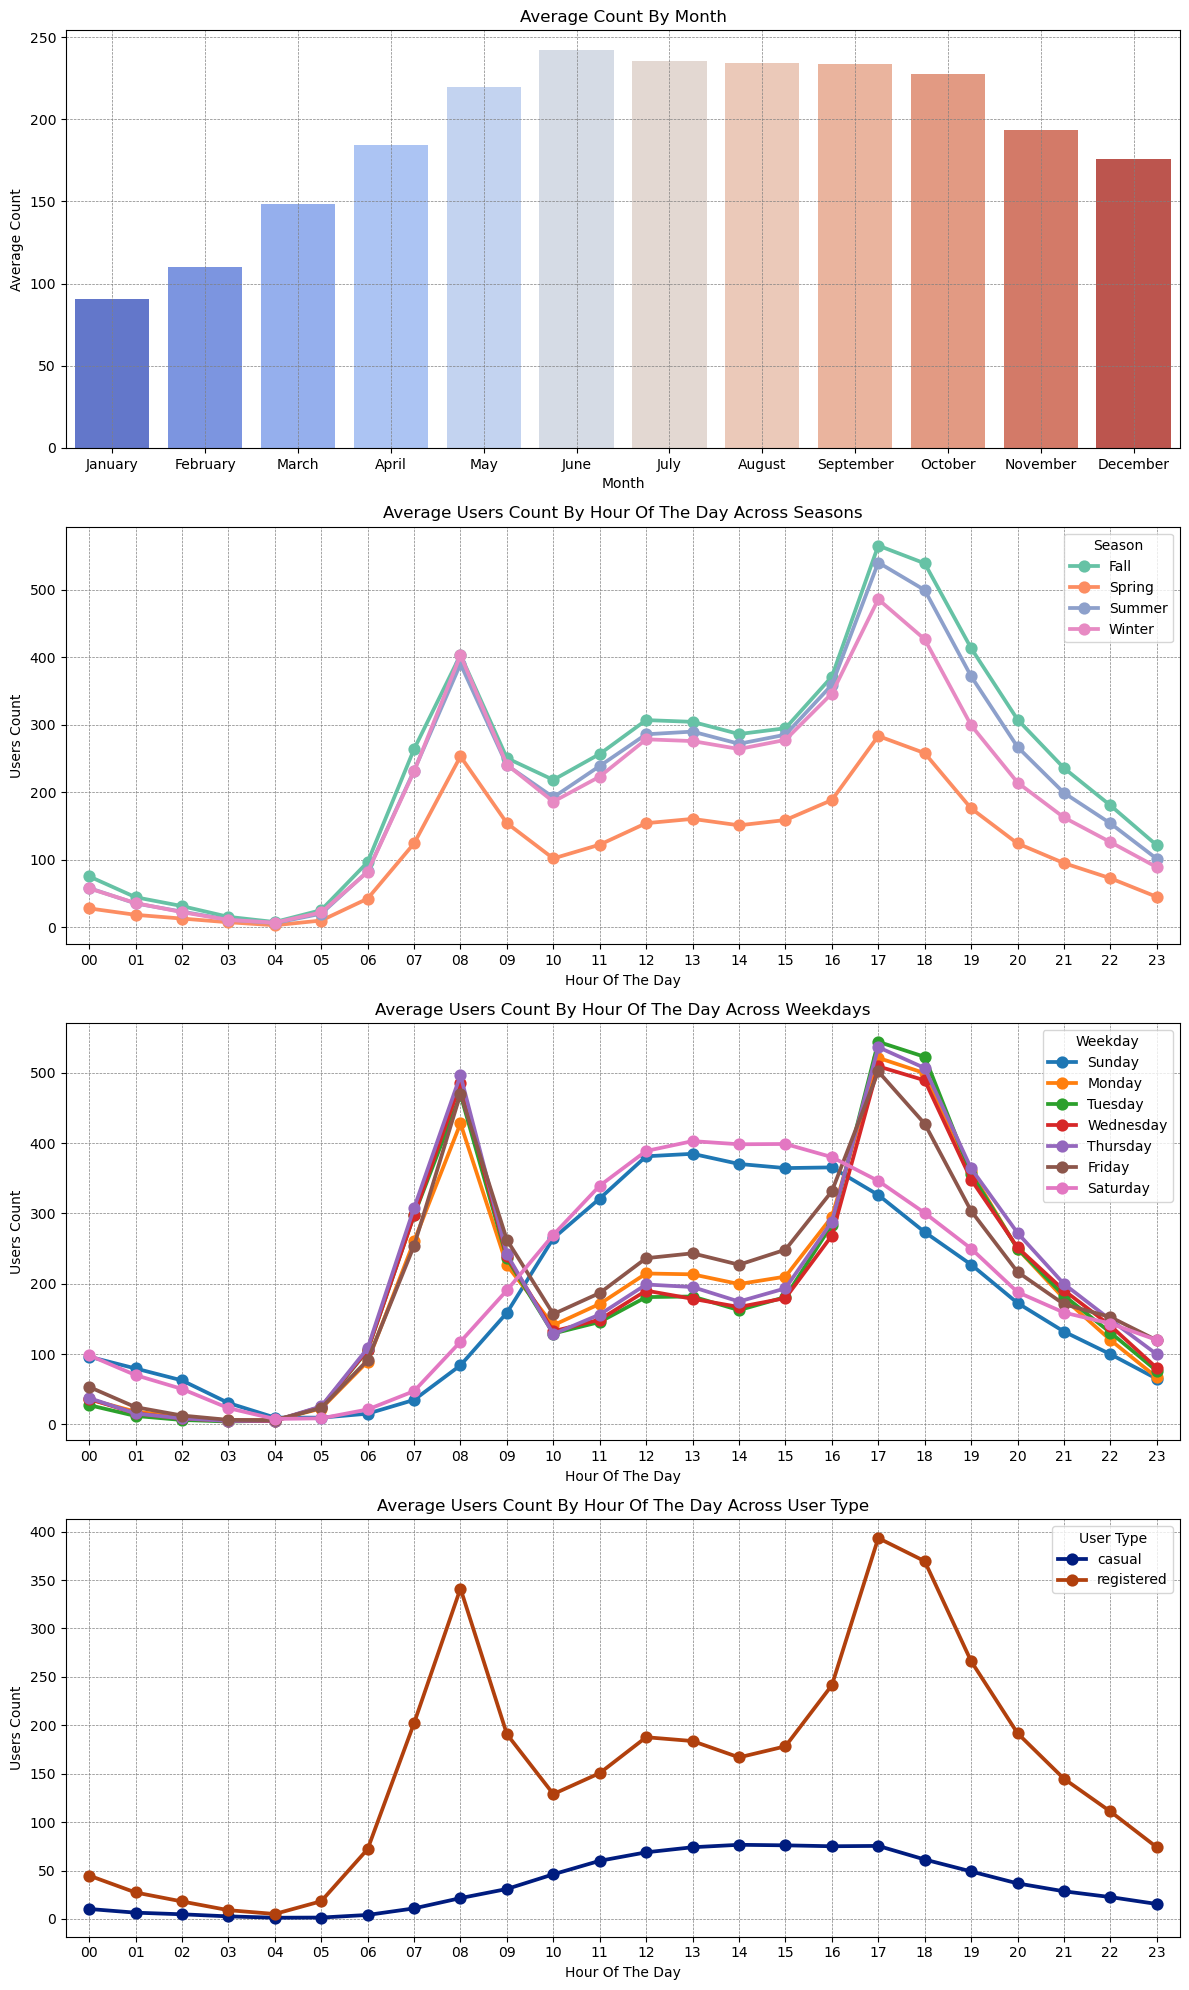

In [50]:
fig, (ax1, ax2, ax3, ax4) = plt.subplots(nrows=4)
fig.set_size_inches(12, 20)

# Defining the order for months and weekdays
sortOrder = ["January", "February", "March", "April", "May", "June", "July", "August", "September", "October", "November", "December"]
hueOrder = ["Sunday", "Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday"]

# Aggregating data by month and plotting
monthAggregated = pd.DataFrame(dailyData.groupby("month")["count"].mean()).reset_index()
monthSorted = monthAggregated.sort_values(by="count", ascending=False)
sn.barplot(data=monthSorted, x="month", y="count", ax=ax1, order=sortOrder, palette="coolwarm")
ax1.set(xlabel='Month', ylabel='Average Count', title="Average Count By Month")
ax1.grid(True, color='grey', linestyle='--', linewidth=0.5)  # Adding grid

# Aggregating data by hour and season, and plotting
hourAggregated = pd.DataFrame(dailyData.groupby(["hour", "season"], sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["season"], data=hourAggregated, ax=ax2, palette="Set2")
ax2.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Seasons")
ax2.grid(True, color='grey', linestyle='--', linewidth=0.5)  # Adding grid
ax2.legend(title='Season', loc='upper right')

# Aggregating data by hour and weekday, and plotting
hourAggregated = pd.DataFrame(dailyData.groupby(["hour", "weekday"], sort=True)["count"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["count"], hue=hourAggregated["weekday"], hue_order=hueOrder, data=hourAggregated, ax=ax3, palette="tab10")
ax3.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across Weekdays")
ax3.grid(True, color='grey', linestyle='--', linewidth=0.5)  # Adding grid
ax3.legend(title='Weekday', loc='upper right')

# Transforming the data for casual and registered users, and plotting
hourTransformed = pd.melt(dailyData[["hour", "casual", "registered"]], id_vars=['hour'], value_vars=['casual', 'registered'])
hourAggregated = pd.DataFrame(hourTransformed.groupby(["hour", "variable"], sort=True)["value"].mean()).reset_index()
sn.pointplot(x=hourAggregated["hour"], y=hourAggregated["value"], hue=hourAggregated["variable"], hue_order=["casual", "registered"], data=hourAggregated, ax=ax4, palette="dark")
ax4.set(xlabel='Hour Of The Day', ylabel='Users Count', title="Average Users Count By Hour Of The Day Across User Type")
ax4.grid(True, color='grey', linestyle='--', linewidth=0.5)  # Adding grid
ax4.legend(title='User Type', loc='upper right')

# Adjust layout to avoid overlap
plt.tight_layout()

((array([-3.82819677, -3.60401975, -3.48099008, ...,  3.48099008,
          3.60401975,  3.82819677]),
  array([0.69314718, 0.69314718, 0.69314718, ..., 6.5971457 , 6.59850903,
         6.5998705 ])),
 (1.3486990121229776, 4.562423868087808, 0.9581176780909612))

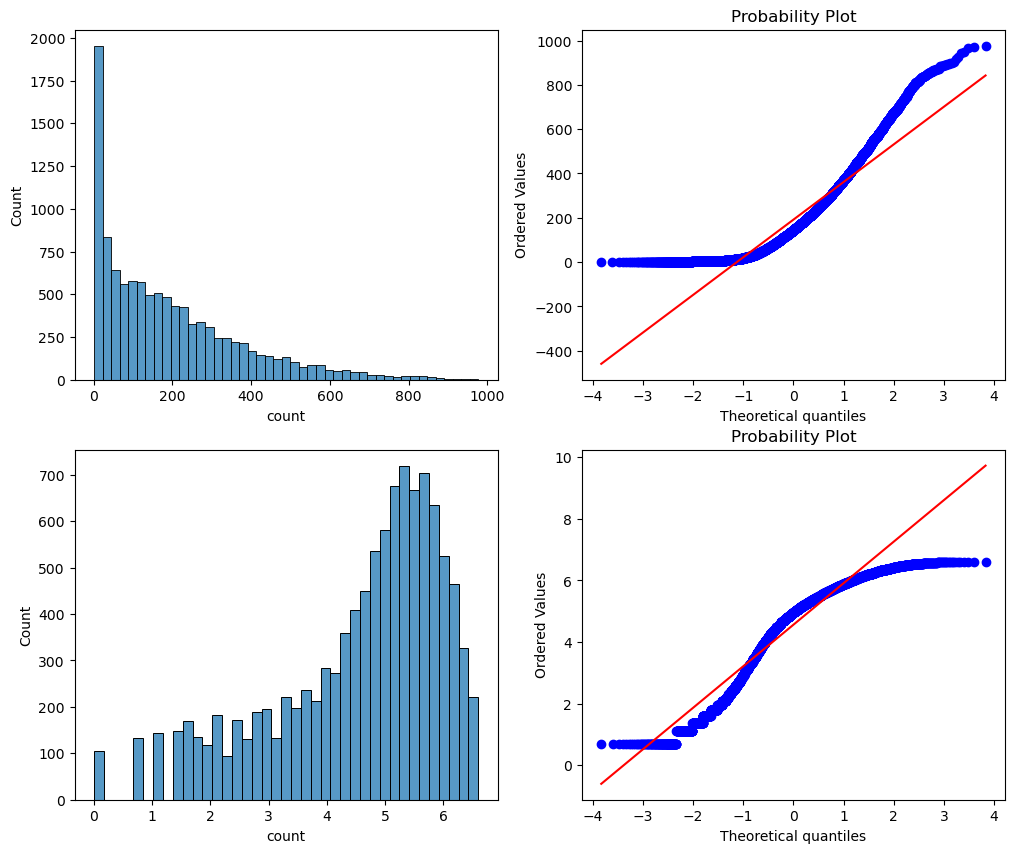

In [48]:
fig,axes = plt.subplots(ncols=2,nrows=2)
fig.set_size_inches(12, 10)
sn.histplot(dailyData["count"],ax=axes[0][0])
stats.probplot(dailyData["count"], dist='norm', fit=True, plot=axes[0][1])
sn.histplot(np.log(dailyDataWithoutOutliers["count"]),ax=axes[1][0])
stats.probplot(np.log1p(dailyDataWithoutOutliers["count"]), dist='norm', fit=True, plot=axes[1][1])

# So we have visualized the data to a greater extent.So lets go and build some models and see how close we can predict the results.

## Filling 0's In windspeed Using Random Forest
## Lets Read In Train And Test Data

In [42]:
dataTrain = pd.read_csv("train.csv")
dataTest = pd.read_csv("test.csv")

In [52]:
#Combine Train And Test
data = pd.concat([dataTrain,dataTest], ignore_index=True)
data.reset_index(inplace=True)

In [ ]:
#Combine Train And Test

#data = pd.concat([dataTrain])
#data.reset_index(inplace=True)

In [54]:
data.head()

,index,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [56]:
data.drop('index',inplace=True,axis=1)

In [58]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0


In [60]:
#Feature Engineering
data["date"] = data.datetime.apply(lambda x : x.split()[0])
data["hour"] = data.datetime.apply(lambda x : x.split()[1].split(":")[0]).astype("int")
data["year"] = data.datetime.apply(lambda x : x.split()[0].split("-")[0])
data["weekday"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").weekday())
data["month"] = data.date.apply(lambda dateString : datetime.strptime(dateString,"%Y-%m-%d").month)

In [62]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0.0,1.0,1.0,2011-01-01,4,2011,5,1


In [64]:
data[data["windspeed"]==0].value_counts()

datetime             season  holiday  workingday  weather  temp   atemp   humidity  windspeed  casual  registered  count  date        hour  year  weekday  month
2011-01-01 00:00:00  1       0        0           1        9.84   14.395  81        0.0        3.0     13.0        16.0   2011-01-01  0     2011  5        1        1
2012-05-05 00:00:00  2       0        0           1        24.60  28.030  83        0.0        42.0    111.0       153.0  2012-05-05  0     2012  5        5        1
2012-05-04 11:00:00  2       0        1           2        28.70  32.575  61        0.0        77.0    181.0       258.0  2012-05-04  11    2012  4        5        1
2012-05-04 09:00:00  2       0        1           1        24.60  28.790  78        0.0        32.0    262.0       294.0  2012-05-04  9     2012  4        5        1
2012-05-04 08:00:00  2       0        1           1        22.96  26.515  88        0.0        34.0    584.0       618.0  2012-05-04  8     2012  4        5        1
         

In [66]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  hour        17379 non-null  int32  
 14  year        17379 non-null  object 
 15  weekday     17379 non-null  int64  
 16  month       17379 non-null  int64  
dtypes: float64(6), int32(1), int64(7), object(3)
memory usage: 2.2+ MB


In [68]:
#Random Forest Model To Predict 0's In Windspeed
from sklearn.ensemble import RandomForestRegressor

dataWind0 = data[data["windspeed"]==0]
dataWindNot0 = data[data["windspeed"]!=0]
rfModel_wind = RandomForestRegressor()
windColumns = ["season","weather","humidity","month","temp","year","atemp"]
rfModel_wind.fit(dataWindNot0[windColumns], dataWindNot0["windspeed"])

wind0Values = rfModel_wind.predict(X= dataWind0[windColumns])
dataWind0["windspeed"] = wind0Values
#data = dataWindNot0.append(dataWind0)
data=pd.concat([dataWindNot0,dataWind0])
data.reset_index(inplace=True)
data.drop('index',inplace=True,axis=1)

In [70]:
data.describe()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,hour,weekday,month
count,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,10886.000000,10886.000000,10886.000000,17379.000000,17379.000000,17379.000000
mean,2.501640,0.028770,0.682721,1.425283,20.376474,23.788755,62.722884,14.074140,36.021955,155.552177,191.574132,11.546752,3.011451,6.537775
std,1.106918,0.167165,0.465431,0.639357,7.894801,8.592511,19.292983,6.901724,49.960477,151.039033,181.144454,6.914405,2.001966,3.438776
min,1.000000,0.000000,0.000000,1.000000,0.820000,0.000000,0.000000,6.003200,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000
25%,2.000000,0.000000,0.000000,1.000000,13.940000,16.665000,48.000000,8.998100,4.000000,36.000000,42.000000,6.000000,1.000000,4.000000
50%,3.000000,0.000000,1.000000,1.000000,20.500000,24.240000,63.000000,12.998000,17.000000,118.000000,145.000000,12.000000,3.000000,7.000000
75%,3.000000,0.000000,1.000000,2.000000,27.060000,31.060000,78.000000,19.001200,49.000000,222.000000,284.000000,18.000000,5.000000,10.000000
max,4.000000,1.000000,1.000000,4.000000,41.000000,50.000000,100.000000,56.996900,367.000000,886.000000,977.000000,23.000000,6.000000,12.000000


In [72]:
dataWindNot0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
5,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,5,2011,5,1
10,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,10,2011,5,1
11,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,11,2011,5,1
12,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,12,2011,5,1
13,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,13,2011,5,1


In [74]:
dataWind0.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,6.881274,3.0,13.0,16.0,2011-01-01,0,2011,5,1
1,2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,6.782276,8.0,32.0,40.0,2011-01-01,1,2011,5,1
2,2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,6.782276,5.0,27.0,32.0,2011-01-01,2,2011,5,1
3,2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,6.568071,3.0,10.0,13.0,2011-01-01,3,2011,5,1
4,2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,6.568071,0.0,1.0,1.0,2011-01-01,4,2011,5,1


In [76]:
data.shape, dataWind0.shape,dataWindNot0.shape

((17379, 17), (2180, 17), (15199, 17))

In [78]:
data["windspeed"].value_counts()

windspeed
8.998100     1738
11.001400    1695
12.998000    1657
7.001500     1617
15.001300    1513
             ... 
16.451372       1
17.468022       1
12.024268       1
10.139673       1
7.061353        1
Name: count, Length: 1614, dtype: int64

In [80]:
#Coercing To Categorical Type
categoricalFeatureNames = ["season","holiday","workingday","weather","weekday","month","year","hour"]
numericalFeatureNames = ["temp","humidity","windspeed","atemp"]
dropFeatures = ['casual',"count","datetime","date","registered"]

In [ ]:
#for var in categoricalFeatureNames:  (This is not required since converting to 
# categorical will cause issue in RMSE score as well require to convert to numpy numerical using one hot encoding or other methods stand scaler or min max)
#    data[var] = data[var].astype("category")

In [82]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   datetime    17379 non-null  object 
 1   season      17379 non-null  int64  
 2   holiday     17379 non-null  int64  
 3   workingday  17379 non-null  int64  
 4   weather     17379 non-null  int64  
 5   temp        17379 non-null  float64
 6   atemp       17379 non-null  float64
 7   humidity    17379 non-null  int64  
 8   windspeed   17379 non-null  float64
 9   casual      10886 non-null  float64
 10  registered  10886 non-null  float64
 11  count       10886 non-null  float64
 12  date        17379 non-null  object 
 13  hour        17379 non-null  int32  
 14  year        17379 non-null  object 
 15  weekday     17379 non-null  int64  
 16  month       17379 non-null  int64  
dtypes: float64(6), int32(1), int64(7), object(3)
memory usage: 2.2+ MB


In [84]:
data.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
0,2011-01-01 05:00:00,1,0,0,2,9.84,12.880,75,6.0032,0.0,1.0,1.0,2011-01-01,5,2011,5,1
1,2011-01-01 10:00:00,1,0,0,1,15.58,19.695,76,16.9979,12.0,24.0,36.0,2011-01-01,10,2011,5,1
2,2011-01-01 11:00:00,1,0,0,1,14.76,16.665,81,19.0012,26.0,30.0,56.0,2011-01-01,11,2011,5,1
3,2011-01-01 12:00:00,1,0,0,1,17.22,21.210,77,19.0012,29.0,55.0,84.0,2011-01-01,12,2011,5,1
4,2011-01-01 13:00:00,1,0,0,2,18.86,22.725,72,19.9995,47.0,47.0,94.0,2011-01-01,13,2011,5,1


In [86]:
#Splitting Train And Test Data
dataTrain = data[pd.notnull(data['count'])].sort_values(by=["datetime"])
dataTest = data[~pd.notnull(data['count'])].sort_values(by=["datetime"])
datetimecol = dataTest["datetime"]
yLabels = dataTrain["count"]
yLablesRegistered = dataTrain["registered"]
yLablesCasual = dataTrain["casual"]

In [88]:
dataTrain.shape, dataTest.shape

((10886, 17), (6493, 17))

In [90]:
dataTest.head()

,datetime,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,count,date,hour,year,weekday,month
9573,2011-01-20 00:00:00,1,0,1,1,10.66,11.365,56,26.002700,NaN,NaN,NaN,2011-01-20,0,2011,3,1
16512,2011-01-20 01:00:00,1,0,1,1,10.66,13.635,56,8.828168,NaN,NaN,NaN,2011-01-20,1,2011,3,1
16513,2011-01-20 02:00:00,1,0,1,1,10.66,13.635,56,8.828168,NaN,NaN,NaN,2011-01-20,2,2011,3,1
9574,2011-01-20 03:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,3,2011,3,1
9575,2011-01-20 04:00:00,1,0,1,1,10.66,12.880,56,11.001400,NaN,NaN,NaN,2011-01-20,4,2011,3,1


In [92]:
#Dropping Unncessary Variables
dataTrain  = dataTrain.drop(dropFeatures,axis=1)
dataTest  = dataTest.drop(dropFeatures,axis=1)

In [94]:
print(dataTrain.shape, dataTest.shape)
dataTest.head()

(10886, 12) (6493, 12)


,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,hour,year,weekday,month
9573,1,0,1,1,10.66,11.365,56,26.002700,0,2011,3,1
16512,1,0,1,1,10.66,13.635,56,8.828168,1,2011,3,1
16513,1,0,1,1,10.66,13.635,56,8.828168,2,2011,3,1
9574,1,0,1,1,10.66,12.880,56,11.001400,3,2011,3,1
9575,1,0,1,1,10.66,12.880,56,11.001400,4,2011,3,1


In [96]:
#RMSLE Scorer
def rmsle(y, y_,convertExp=True): #y1,y2
    if convertExp:
        y = np.exp(y),
        y_ = np.exp(y_)
    log1 = np.nan_to_num(np.array([np.log(v + 1) for v in y]))
    log2 = np.nan_to_num(np.array([np.log(v + 1) for v in y_]))
    calc = (log1 - log2) ** 2
    return np.sqrt(np.mean(calc))

In [98]:
#Linear Regression Model
from sklearn.linear_model import LinearRegression,Ridge,Lasso
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
import warnings
pd.options.mode.chained_assignment = None
warnings.filterwarnings("ignore", category=DeprecationWarning)

# Initialize logistic regression model
lModel = LinearRegression()

# Train the model
yLabelsLog = np.log1p(yLabels)
lModel.fit(X = dataTrain,y = yLabelsLog)

# Make predictions
preds = lModel.predict(X= dataTrain)
print ("RMSLE Value For Linear Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Linear Regression:  0.9779574969455253


In [100]:
dataTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 10886 entries, 15199 to 9572
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      10886 non-null  int64  
 1   holiday     10886 non-null  int64  
 2   workingday  10886 non-null  int64  
 3   weather     10886 non-null  int64  
 4   temp        10886 non-null  float64
 5   atemp       10886 non-null  float64
 6   humidity    10886 non-null  int64  
 7   windspeed   10886 non-null  float64
 8   hour        10886 non-null  int32  
 9   year        10886 non-null  object 
 10  weekday     10886 non-null  int64  
 11  month       10886 non-null  int64  
dtypes: float64(3), int32(1), int64(7), object(1)
memory usage: 1.0+ MB


if isinstance(X, list):
    print("Yes")
else:
    print("No")

import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd

# Ensure dataTrain and yLabels are correctly formatted (numpy arrays or pandas DataFrame/Series)
if isinstance(dataTrain, list):
    dataTrain = np.array(dataTrain)
   
if isinstance(yLabels, list):
    yLabels = np.array(yLabels)

# Initialize linear regression model
lModel = LinearRegression()

# Log-transform the target variable
yLabelsLog = np.log1p(yLabels)

# Train the model
lModel.fit(X=dataTrain, y=yLabelsLog)

# Make predictions on the training data
preds = lModel.predict(X=dataTrain)

# Define the RMSLE function
def rmsle(y_true, y_pred, convert_exp=True):
    if convert_exp:
        y_true = np.expm1(y_true)  # Reversing log1p transformation: exp(x) - 1
        y_pred = np.expm1(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Print RMSLE Value for Linear Regression
print("RMSLE Value For Linear Regression:", rmsle(y_true=yLabelsLog, y_pred=preds, convert_exp=True))

import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression

# Ensure dataTrain is a DataFrame
if isinstance(dataTrain, list):
    dataTrain = pd.DataFrame(dataTrain)

# Check if all columns are numerical
if not np.issubdtype(dataTrain.dtypes, np.number):
    # Convert categorical columns to numerical (one-hot encoding)
    dataTrain = pd.get_dummies(dataTrain)

# Ensure yLabels is correctly formatted as a NumPy array
yLabels = np.array(yLabels)

# Initialize linear regression model
lModel = LinearRegression()

# Log-transform the target variable
yLabelsLog = np.log1p(yLabels)

# Train the model
lModel.fit(X=dataTrain, y=yLabelsLog)

# Make predictions on the training data
preds = lModel.predict(X=dataTrain)

# Define the RMSLE function
def rmsle(y_true, y_pred, convert_exp=True):
    if convert_exp:
        y_true = np.expm1(y_true)  # Reversing log1p transformation: exp(x) - 1
        y_pred = np.expm1(y_pred)
    return np.sqrt(np.mean(np.square(np.log1p(y_pred) - np.log1p(y_true))))

# Print RMSLE Value for Linear Regression
print("RMSLE Value For Linear Regression:", rmsle(y_true=yLabelsLog, y_pred=preds, convert_exp=True))

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779574818708662


KeyError: 'mean_validation_score'

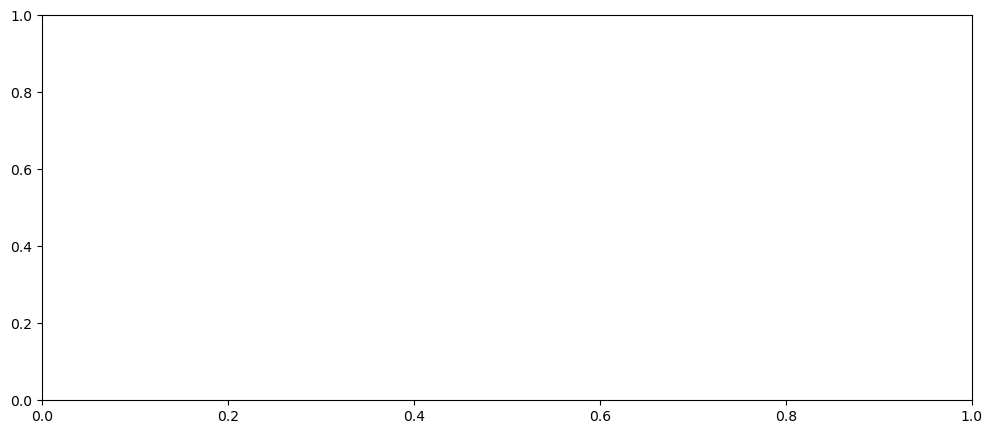

In [108]:
#Regularization Model - Ridge
ridge_m_ = Ridge()
ridge_params_ = { 'max_iter':[3000],'alpha':[0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000]}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV( ridge_m_,
                          ridge_params_,
                          scoring = rmsle_scorer,
                          cv=5)
yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit( dataTrain, yLabelsLog )
preds = grid_ridge_m.predict(X= dataTrain)
print (grid_ridge_m.best_params_)
print ("RMSLE Value For Ridge Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["param_alpha"]
df["rmsle"] = df["mean_validation_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [ ]:
#KeyError: 'mean_validation_score'

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779574818708662


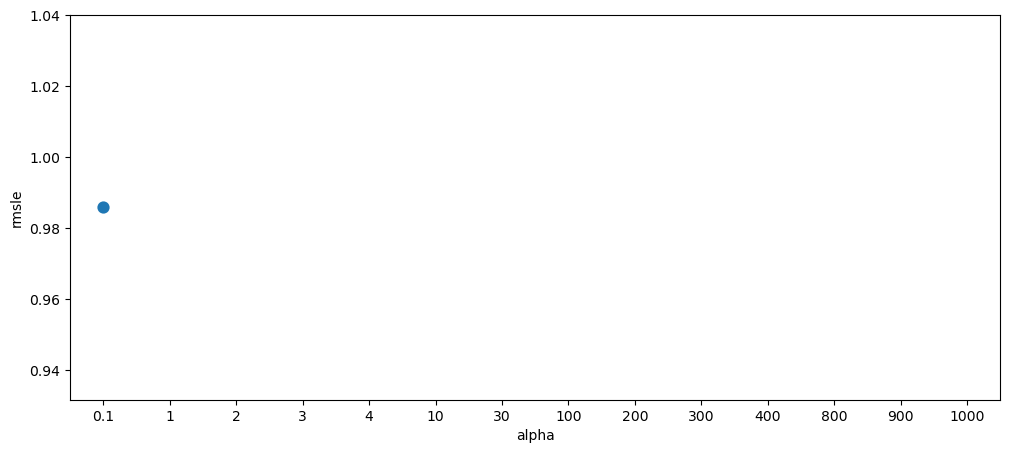

In [110]:
ridge_m_ = Ridge()
ridge_params_ = {
    'max_iter': [3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,
                            ridge_params_,
                            scoring=rmsle_scorer,
                            cv=5)

yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(dataTrain, yLabelsLog)
preds = grid_ridge_m.predict(X=dataTrain)

print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

# Updated part for plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# Use cv_results_ instead of grid_scores_
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["param_alpha"]
df["rmsle"] = df["mean_test_score"].apply(lambda x: -x)

# Plotting the results
sn.pointplot(data=df, x="alpha", y="rmsle", ax=ax)
plt.show()


{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779574818708662
   alpha  mean_test_score
0    0.1        -0.985932
1      1        -0.985934
2      2        -0.985935
3      3        -0.985937
4      4        -0.985939
5     10        -0.985951
6     30        -0.986006
7    100        -0.986343
8    200        -0.987097
9    300        -0.988059
10   400        -0.989153
11   800        -0.994033
12   900        -0.995267
13  1000        -0.996483


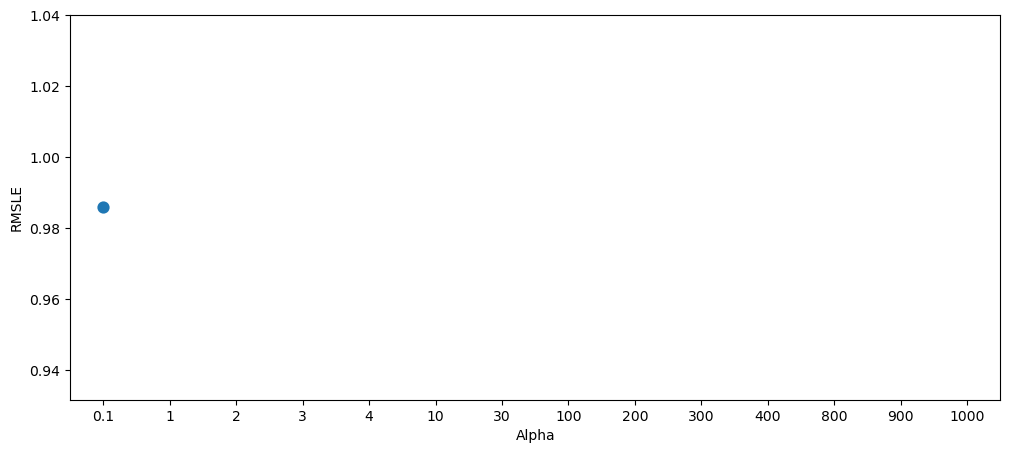

In [166]:
ridge_m_ = Ridge()
ridge_params_ = {
    'max_iter': [3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}
rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,
                            ridge_params_,
                            scoring=rmsle_scorer,
                            cv=5)

yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(dataTrain, yLabelsLog)
preds = grid_ridge_m.predict(X=dataTrain)

print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

# Updated part for plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# Use cv_results_ to extract multiple alpha values
df = pd.DataFrame(grid_ridge_m.cv_results_)
df["alpha"] = df["param_alpha"]

# Check if multiple alphas are available
print(df[["alpha", "mean_test_score"]])

# Apply the correct transformation
df["rmsle"] = df["mean_test_score"].apply(lambda x: -x)

# Plotting the results
sn.pointplot(data=df, x="alpha", y="rmsle",hue=None, ax=ax)
ax.set_xlabel('Alpha')
ax.set_ylabel('RMSLE')
plt.show()


In [126]:
df["rmsle"] 

0     0.985932
1     0.985934
2     0.985935
3     0.985937
4     0.985939
5     0.985951
6     0.986006
7     0.986343
8     0.987097
9     0.988059
10    0.989153
11    0.994033
12    0.995267
13    0.996483
Name: rmsle, dtype: float64

{'alpha': 0.1, 'max_iter': 3000}
RMSLE Value For Ridge Regression:  0.9779574818708662
   alpha     rmsle
0    0.1  0.985932
1      1  0.985934
2      2  0.985935
3      3  0.985937
4      4  0.985939
5     10  0.985951
6     30  0.986006
7    100  0.986343
8    200  0.987097
9    300  0.988059
10   400  0.989153
11   800  0.994033
12   900  0.995267
13  1000  0.996483


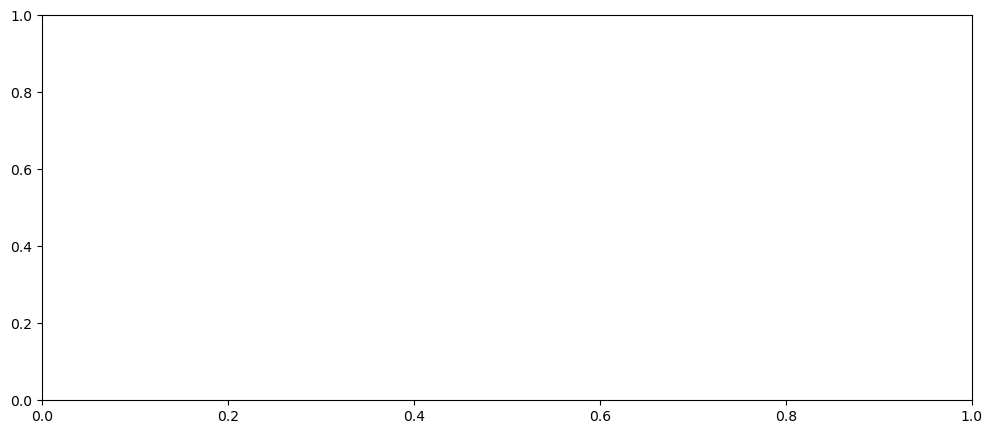

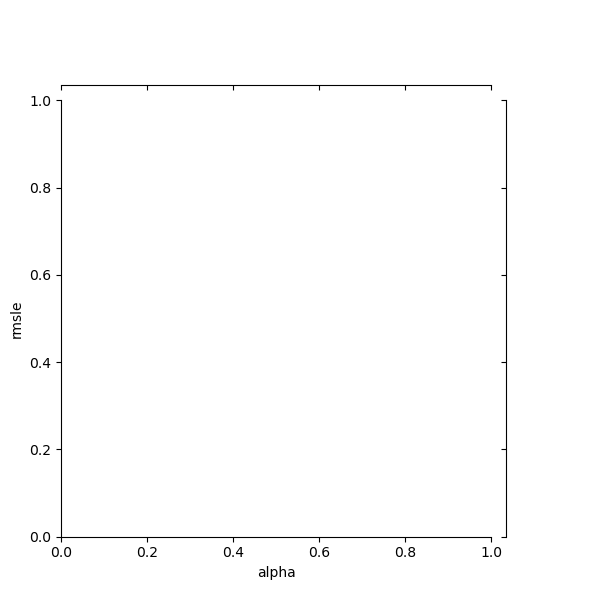

In [172]:
ridge_m_ = Ridge()
ridge_params_ = {
    'max_iter': [3000],
    'alpha': [0.1, 1, 2, 3, 4, 10, 30, 100, 200, 300, 400, 800, 900, 1000]
}

rmsle_scorer = metrics.make_scorer(rmsle, greater_is_better=False)
grid_ridge_m = GridSearchCV(ridge_m_,
                            ridge_params_,
                            scoring=rmsle_scorer,
                            cv=5)

yLabelsLog = np.log1p(yLabels)
grid_ridge_m.fit(dataTrain, yLabelsLog)
preds = grid_ridge_m.predict(X=dataTrain)

print(grid_ridge_m.best_params_)
print("RMSLE Value For Ridge Regression: ", rmsle(np.exp(yLabelsLog), np.exp(preds), False))

# Plotting
fig, ax = plt.subplots()
fig.set_size_inches(12, 5)

# Use cv_results_ to extract the grid search results
df = pd.DataFrame(grid_ridge_m.cv_results_)

# Extract the alpha values and corresponding scores
df["alpha"] = df["param_alpha"]
df["rmsle"] = df["mean_test_score"].apply(lambda x: -x)  # Negate since rmsle_scorer is negative

# Print DataFrame to confirm it has multiple values
print(df[["alpha", "rmsle"]])

# Plot the results using seaborn lineplot for better handling of numeric x-values
sn.JointGrid(data=df, x="alpha", y="rmsle", hue=None)

#plt.xscale("log")  # Set the x-axis to a logarithmic scale to better visualize alpha values
plt.show()


In [ ]:
import nltk
import sklearn

print('The nltk version is {}.'.format(nltk.__version__))
print('The scikit-learn version is {}.'.format(sklearn.__version__))

{'alpha': 0.005, 'max_iter': 3000}
RMSLE Value For Lasso Regression:  0.9780946005781137


<Axes: xlabel='alpha', ylabel='rmsle'>

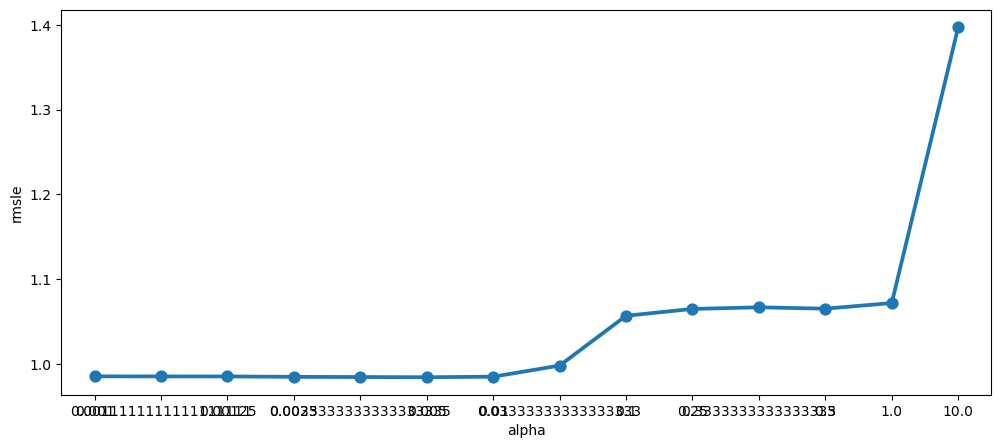

In [178]:
lasso_m_ = Lasso()

alpha  = 1/np.array([0.1, 1, 2, 3, 4, 10, 30,100,200,300,400,800,900,1000])
lasso_params_ = { 'max_iter':[3000],'alpha':alpha}

grid_lasso_m = GridSearchCV( lasso_m_,lasso_params_,scoring = rmsle_scorer,cv=5)
yLabelsLog = np.log1p(yLabels)
grid_lasso_m.fit( dataTrain, yLabelsLog )
preds = grid_lasso_m.predict(X= dataTrain)
print (grid_lasso_m.best_params_)
print ("RMSLE Value For Lasso Regression: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

fig,ax= plt.subplots()
fig.set_size_inches(12,5)
df = pd.DataFrame(grid_lasso_m.cv_results_)
df["alpha"] = df["param_alpha"]
df["rmsle"] = df["mean_test_score"].apply(lambda x:-x)
sn.pointplot(data=df,x="alpha",y="rmsle",ax=ax)

In [180]:
df["alpha"] ,df["rmsle"] 

(0         10.0
 1          1.0
 2          0.5
 3     0.333333
 4         0.25
 5          0.1
 6     0.033333
 7         0.01
 8        0.005
 9     0.003333
 10      0.0025
 11     0.00125
 12    0.001111
 13       0.001
 Name: alpha, dtype: object,
 0     1.397124
 1     1.071947
 2     1.065329
 3     1.066932
 4     1.065038
 5     1.056960
 6     0.998245
 7     0.985151
 8     0.984516
 9     0.984741
 10    0.984978
 11    0.985436
 12    0.985493
 13    0.985541
 Name: rmsle, dtype: float64)

In [182]:
from sklearn.ensemble import RandomForestRegressor
rfModel = RandomForestRegressor(n_estimators=100)
yLabelsLog = np.log1p(yLabels)
rfModel.fit(dataTrain,yLabelsLog)
preds = rfModel.predict(X= dataTrain)
print ("RMSLE Value For Random Forest: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Random Forest:  0.10279354144092229


In [184]:
from sklearn.ensemble import GradientBoostingRegressor
gbm = GradientBoostingRegressor(n_estimators=4000,alpha=0.01); ### Test 0.41
yLabelsLog = np.log1p(yLabels)
gbm.fit(dataTrain,yLabelsLog)
preds = gbm.predict(X= dataTrain)
print ("RMSLE Value For Gradient Boost: ",rmsle(np.exp(yLabelsLog),np.exp(preds),False))

RMSLE Value For Gradient Boost:  0.18969287758816122


<Axes: ylabel='Count'>

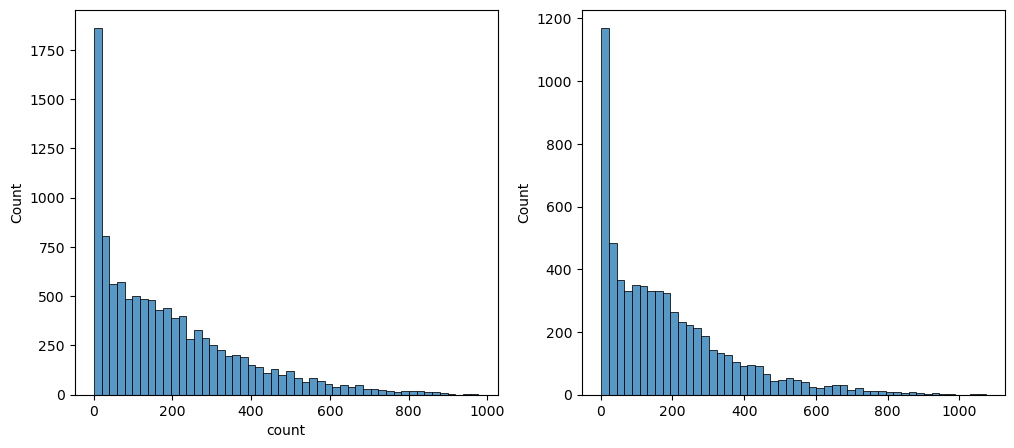

In [188]:
predsTest = gbm.predict(X= dataTest)
fig,(ax1,ax2)= plt.subplots(ncols=2)
fig.set_size_inches(12,5)
sn.histplot(yLabels,ax=ax1,bins=50)
sn.histplot(np.exp(predsTest),ax=ax2,bins=50)

In [190]:
submission = pd.DataFrame({
        "datetime": datetimecol,
        "count": [max(0, x) for x in np.exp(predsTest)]
    })
submission.to_csv('bike_predictions_gbm_separate_without_fe.csv', index=False)